<a href="https://colab.research.google.com/github/parthd06/ML_Algorithms/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Algorithm:**

# **Linear Regression:**

##Linear regression is a basic and commonly used type of predictive analysis.

## **The overall idea of regression is to examine two things:**

### (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  

### (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

## Types of Linear Regression:

### **Simple linear regression**
1 dependent variable (interval or ratio), 1 independent variable (interval or ratio or dichotomous)

### **Multiple linear regression**
1 dependent variable (interval or ratio) , 2+ independent variables (interval or ratio or dichotomous)

### **Logistic regression**
1 dependent variable (dichotomous), 2+ independent variable(s) (interval or ratio or dichotomous)

### **Ordinal regression**
1 dependent variable (ordinal), 1+ independent variable(s) (nominal or dichotomous)

### **Multinomial regression**
1 dependent variable (nominal), 1+ independent variable(s) (interval or ratio or dichotomous)

### **Discriminant analysis**
1 dependent variable (nominal), 1+ independent variable(s) (interval or ratio)

In [1]:
#import libraries
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline 


## **Data Collection** 
## Here we are using the Boston House Dataset.

In [3]:
#Load the Boston Housing DataSet from scikit-learn

from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys() #Pandas dataframe.keys() function returns the ‘info axis’ for the pandas object. If the pandas object is series then it returns index. If the pandas object is dataframe then it returns columns. If the pandas object is panel then it returns major_axis.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
#Load the data into pandas dataframe

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#The target values is missing from the data. Create a new column of target values and add it to dataframe
boston['MEDV'] = boston_dataset.target

## **Data Preprocessing**

In [6]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


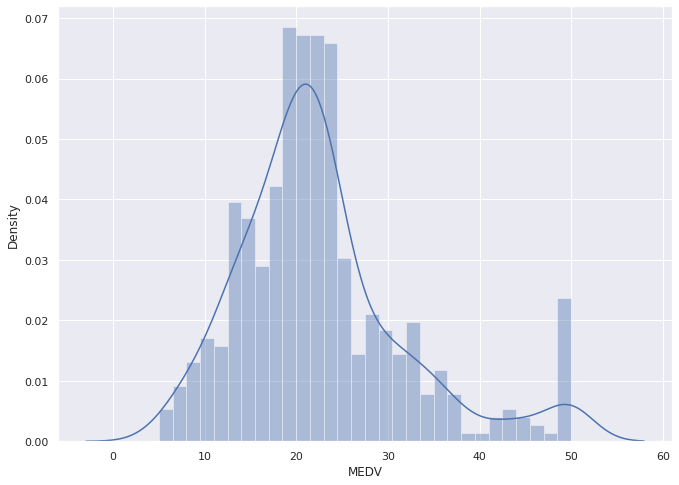

In [7]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11,8)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

## **Corelation Matrix**

In [8]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

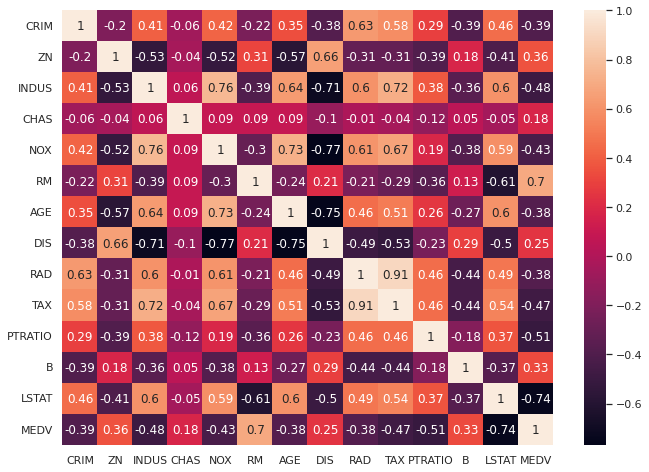

In [9]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## **Observations**

### From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

### RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

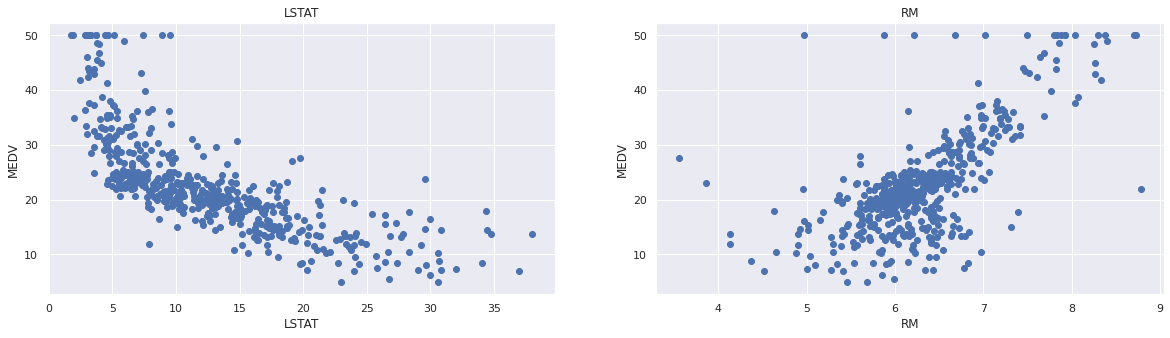

In [10]:
plt.figure(figsize=(20, 5)) # width and Height in Inches

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [11]:
#Prepare data for training
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [12]:
#Split the data into training and testing data

from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:
#Train thye model using sklearn LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression()

## **RMSE : Root Mean Suqred Error**

Regression analysis is a technique we can use to understand the relationship between one or more predictor variables and a response variable. 

### One way to assess how well a regression model fits a dataset is to calculate the root mean square error, which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.

The lower the RMSE, the better a given model is able to “fit” a dataset.

The formula to find the root mean square error, often abbreviated RMSE, is as follows:

RMSE = √Σ(Pi – Oi)2 / n

where:

Σ is a fancy symbol that means “sum”
Pi is the predicted value for the ith observation in the dataset
Oi is the observed value for the ith observation in the dataset
n is the sample size
The following example shows how to interpret RMSE for a given regression model.

Example: How to Interpret RMSE for a Regression Model
Suppose we would like to build a regression model that uses “hours studied” to predictor “exam score” of students on a particular college entrance exam.

We collect the following data for 15 students:

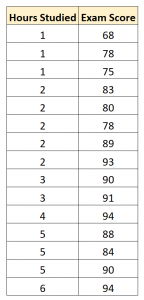

We then use statistical software (like Excel, SPSS, R, Python) etc. to find the following fitted regression model:

Exam Score = 75.95 + 3.08*(Hours Studied)

We can then use this equation to predict the exam score of each student, based on how many hours they studied:

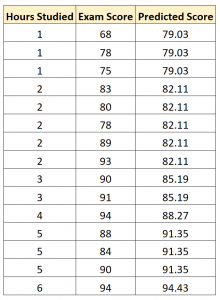

We can then calculate the squared difference between each predicted exam score and the actual exam score. Then we can take the square root of the mean of these differences:

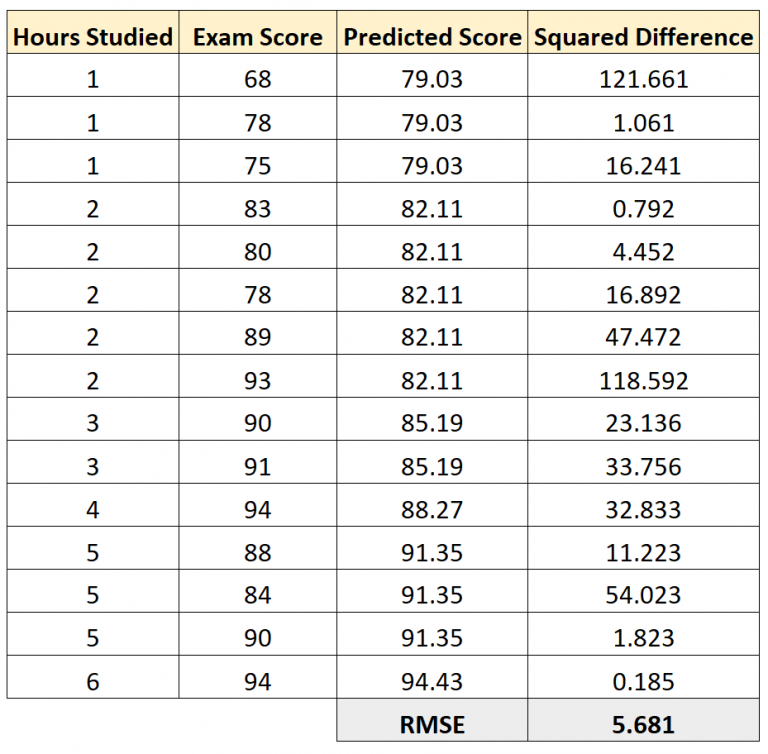

The RMSE for this regression model turns out to be 5.681.

Recall that the residuals of a regression model are the differences between the observed data values and the predicted values from the model.

Residual = (Pi – Oi)

where

Pi is the predicted value for the ith observation in the dataset
Oi is the observed value for the ith observation in the dataset
And recall that the RMSE of a regression model is calculated as:

RMSE = √Σ(Pi – Oi)2 / n

This means that the RMSE represents the square root of the variance of the residuals.

This is a useful value to know because it gives us an idea of the average distance between the observed data values and the predicted data values.

This is in contrast to the R-squared of the model, which tells us the proportion of the variance in the response variable that can be explained by the predictor variable(s) in the model.

Comparing RMSE Values from Different Models
The RMSE is particularly useful for comparing the fit of different regression models.

In [17]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


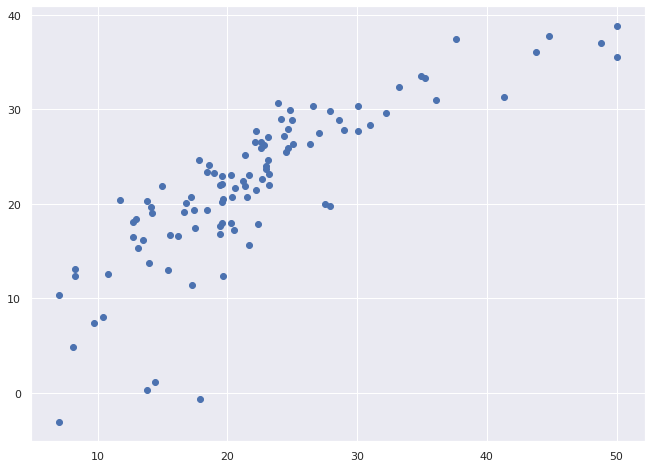

In [19]:
 #plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

## Logistic Regression on MNIST Dataset

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

In [21]:
# Print to show there are 1797 images 8 by 8 images for a dimensionality of 64
print("Image Data Shape" , digits.data.shape)

Image Data Shape (1797, 64)


In [22]:
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Label Data Shape (1797,)


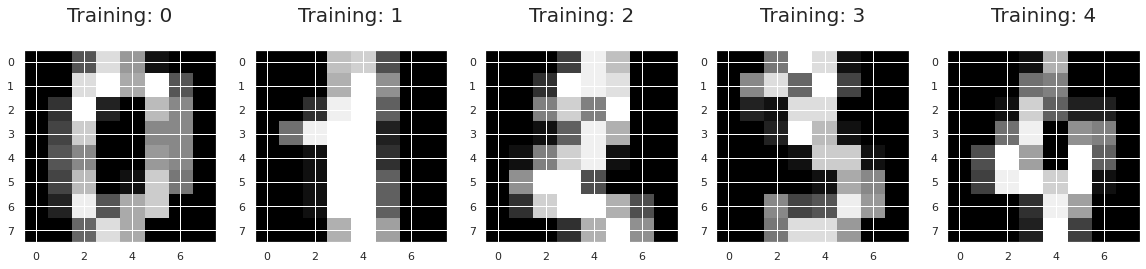

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [27]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [29]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [30]:
predictions = logisticRegr.predict(x_test)

In [31]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [33]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


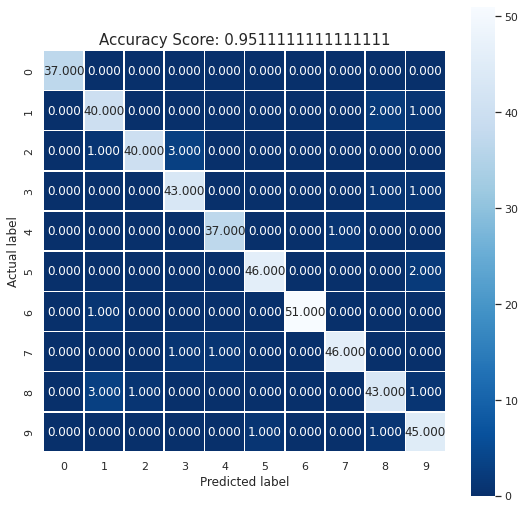

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## **References:**
1. [Logistic Regression using Python (scikit-learn) | by Michael Galarnyk | Towards Data Science](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)
2. [Logistic Regression in Python | Techniques for Logistic Regression (educba.com)](https://www.educba.com/logistic-regression-in-python/)